Model loaded from mnist_cnn_model.h5
Test accuracy: 99.03%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


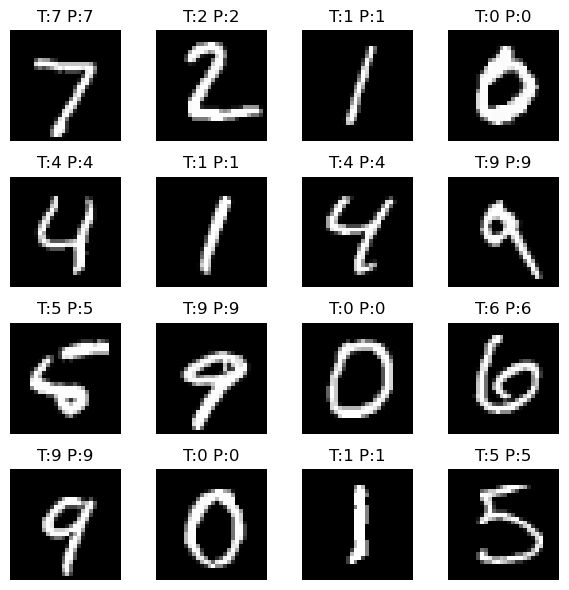

In [1]:
# Name: Vikas Saahil
# Student no.: 239408810
# Loads saved model, evaluates on MNIST test set, shows some predictions.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def load_and_preprocess():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_test = x_test.astype("float32") / 255.0
    x_test = np.expand_dims(x_test, -1)
    return x_test, y_test

def main():
    x_test, y_test = load_and_preprocess()
    model = tf.keras.models.load_model("mnist_cnn_model.h5")
    print("Model loaded from mnist_cnn_model.h5")
    # Evaluate accuracy on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {test_acc*100:.2f}%")
    num_images = 16
    images = x_test[:num_images]
    labels = y_test[:num_images]
    # Get predictions
    pred_probs = model.predict(images)
    pred_labels = np.argmax(pred_probs, axis=1)
    # Plots images with true and predicted labels
    plt.figure(figsize=(6, 6))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"T:{labels[i]} P:{pred_labels[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    main()